In [16]:
# Load Data
import pandas as pd

df = pd.read_csv("/kaggle/input/student-study-hours/score_updated.csv")
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
..    ...     ...
91    5.8      60
92    4.4      44
93    6.1      63
94    3.7      37
95    8.0      84

[96 rows x 2 columns]


In [17]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X = df[['Hours']]
Y = df['Scores']
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)
X_train.head()

,Hours
43,3.7
62,3.4
3,8.5
86,6.8
45,4.1


In [18]:
# Train Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)
print(y_pred)

[96.05248948 41.34950344 33.39270547 47.31710192 69.19829633 73.17669532
 26.43050725 57.26309938 25.4359075  15.48991004 37.37110445 31.40350598
 66.21449709 34.38730522 56.26849963 17.47910953 39.36030395 79.1442938
 82.12809303 84.11729253]


In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_percentage_error(y_test, y_pred))

R2 Score: 0.9743716699006577
MAE: 2.8925583517538658
RMSE: 3.725791315611155
0.06560719743146226


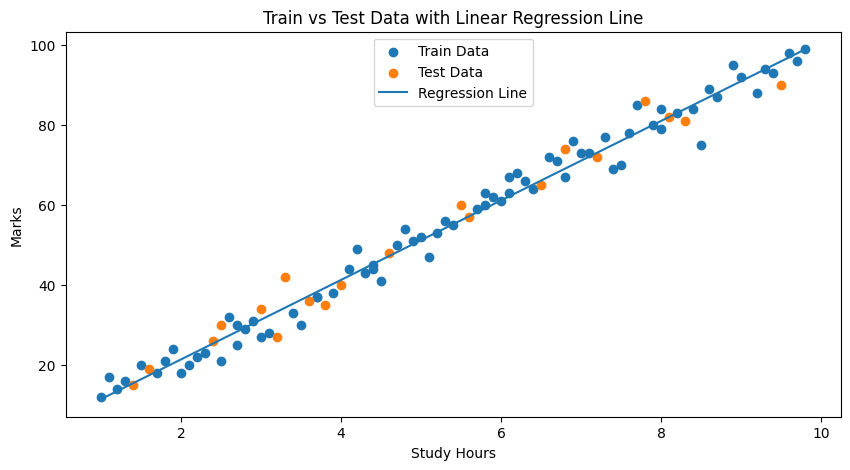

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
# Train data
plt.scatter(X_train, y_train, label="Train Data")

# Test data
plt.scatter(X_test, y_test, label="Test Data")

# Regression line (sorted for clean line)
X_sorted = X.sort_values(by="Hours")
plt.plot(X_sorted, model.predict(X_sorted), label="Regression Line")

plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Train vs Test Data with Linear Regression Line")
plt.legend(loc='upper center')
plt.show()